In [2]:
library(rhdf5)
library(SingleCellExperiment)
library(umap)
library(ggplot2)

In [36]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/pseudocells_Danai/Pseudobulk_per_donor_DA_all_conditions_Leiden_res34.h5"

In [37]:
h5ls(filename)

,group,name,otype,dclass,dim
0,/,X,H5I_DATASET,FLOAT,x 8479
1,/,obs,H5I_GROUP,,
2,/obs,__categories,H5I_GROUP,,
3,/obs/__categories,batch,H5I_DATASET,STRING,3
4,/obs/__categories,celltype,H5I_DATASET,STRING,1
5,/obs/__categories,donor_id,H5I_DATASET,STRING,188
6,/obs/__categories,leiden_res_34_euclidean,H5I_DATASET,STRING,43
7,/obs/__categories,time_point,H5I_DATASET,STRING,2
8,/obs/__categories,treatment,H5I_DATASET,STRING,2
9,/obs,_index,H5I_DATASET,STRING,8479


In [38]:
X = h5read(file = filename, "X")

In [39]:
ngenes = nrow(X)
n_pseudocells = ncol(X)

In [40]:
categorical_cols = names(h5read(file = filename, "obs/__categories"))
categorical_cols

[1] "batch"                   "celltype"               
[3] "donor_id"                "leiden_res_34_euclidean"
[5] "time_point"              "treatment"

In [41]:
obs = h5read(file = filename, "obs")
all_cols = names(obs)

In [42]:
df = data.frame(row.names = 1:n_pseudocells)
head(df)
for (col in all_cols){
#     print(col)
    if (col %in% categorical_cols){
#         print(col)
        colname = paste0("obs/__categories/",col)
#         print(h5read(file = filename,colname))
        df[[col]] = h5read(file = filename,colname)[((as.numeric(obs[[col]]))+1)]
    }
}

1
2
3
4
5
6

In [43]:
df$condition = df$batch
df$batch  = c()
df$donor = gsub(".*-","",df$donor_id)
df$pseudocell = paste0(df$donor,"-",df$condition,"-cluster",df$leiden_res_34_euclidean)
head(df,2)

celltype,donor_id,leiden_res_34_euclidean,time_point,treatment,condition,donor,pseudocell
DA,HPSI0714i-iudw_1,0,D30,NONE,d30,iudw_1,iudw_1-d30-cluster0
DA,HPSI0714i-iudw_1,1,D30,NONE,d30,iudw_1,iudw_1-d30-cluster1


In [44]:
var = h5read(file = filename, "var/gene_ids-0-d30") # gene names

In [45]:
head(var)

[1] "ENSG00000243485" "ENSG00000237613" "ENSG00000186092" "ENSG00000238009"
[5] "ENSG00000239945" "ENSG00000237683"

In [46]:
Mat = X
rownames(Mat) <- as.character(var)
colnames(Mat) <- as.character(df$pseudocell)
Mat[1:5,1:5]

,iudw_1-d30-cluster0,iudw_1-d30-cluster1,iudw_1-d30-cluster2,iudw_1-d30-cluster3,iudw_1-d30-cluster4
ENSG00000243485,0,0,0,0,0
ENSG00000237613,0,0,0,0,0
ENSG00000186092,0,0,0,0,0
ENSG00000238009,0,0,0,0,0
ENSG00000239945,0,0,0,0,0


In [47]:
sce <- SingleCellExperiment(
assays = list(counts = Mat),
colData = df)
sce

class: SingleCellExperiment 
dim: 32738 8479 
metadata(0):
assays(1): counts
rownames(32738): ENSG00000243485 ENSG00000237613 ... ENSG00000215616
  ENSG00000215611
rowData names(0):
colnames(8479): iudw_1-d30-cluster0 iudw_1-d30-cluster1 ...
  rozh_4-d52_tr-cluster11 rozh_4-d52_tr-cluster12
colData names(8): celltype donor_id ... donor pseudocell
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [48]:
saveRDS(sce, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/pseudocells_Danai/Pseudobulk_per_donor_DA_all_conditions_Leiden_res34_sce.rds")

In [49]:
sce_d52_untr = sce[,sce$condition == "d52_untr"]
sce_d52_untr

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

class: SingleCellExperiment 
dim: 32738 3204 
metadata(0):
assays(1): counts
rownames(32738): ENSG00000243485 ENSG00000237613 ... ENSG00000215616
  ENSG00000215611
rowData names(0):
colnames(3204): paim_1-d52_untr-cluster0 paim_1-d52_untr-cluster1 ...
  vass_1-d52_untr-cluster10 vass_1-d52_untr-cluster11
colData names(8): celltype donor_id ... donor pseudocell
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [50]:
saveRDS(sce_d52_untr, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/pseudocells_Danai/Pseudobulk_per_donor_DA_D52untreated_Leiden_res34_sce.rds")

In [3]:
sce = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/pseudocells_Danai/Pseudobulk_per_donor_DA_all_conditions_Leiden_res34_sce.rds")

In [4]:
sce

class: SingleCellExperiment 
dim: 32738 8479 
metadata(0):
assays(1): counts
rownames(32738): ENSG00000243485 ENSG00000237613 ... ENSG00000215616
  ENSG00000215611
rowData names(0):
colnames(8479): iudw_1-d30-cluster0 iudw_1-d30-cluster1 ...
  rozh_4-d52_tr-cluster11 rozh_4-d52_tr-cluster12
colData names(8): celltype donor_id ... donor pseudocell
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [5]:
df = data.frame(donor = sce$donor_id, pseudocell = sce$pseudocell)

In [6]:
pca = prcomp(t(counts(sce)))$x
pca[1:5,1:5]

,PC1,PC2,PC3,PC4,PC5
iudw_1-d30-cluster0,-26.66821,41.30239,-31.204277,7.2976037,-2.2350281
iudw_1-d30-cluster1,-54.60781,21.28096,19.619798,3.2265867,0.7486501
iudw_1-d30-cluster2,-17.01937,27.66913,8.239283,-6.6002200,-11.4533427
iudw_1-d30-cluster3,-73.63192,22.84237,19.631837,-1.3517803,-3.2369869
iudw_1-d30-cluster4,-75.27913,25.57432,-5.982582,0.5310912,-1.2517279


In [7]:
df_pca = data.frame(pca)
df_pca[1:2,1:5]

,PC1,PC2,PC3,PC4,PC5
iudw_1-d30-cluster0,-26.66821,41.30239,-31.20428,7.297604,-2.2350281
iudw_1-d30-cluster1,-54.60781,21.28096,19.61980,3.226587,0.7486501


In [8]:
df_pca$condition = sce$condition
df_pca$donor = sce$donor
df_pca$pseudocell = sce$pseudocell

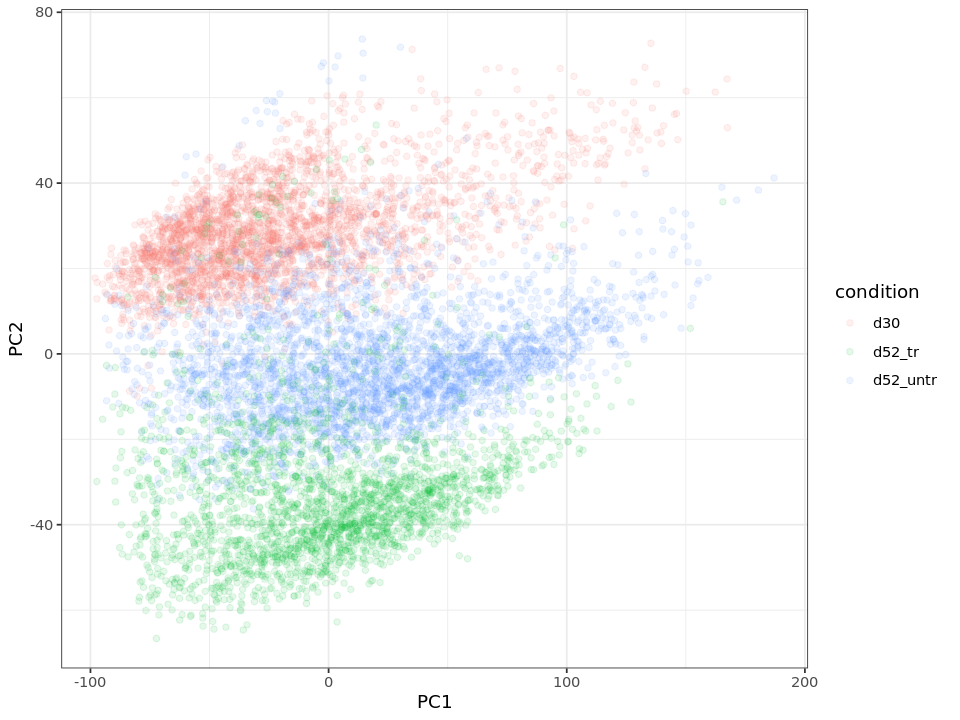

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df_pca, aes(x = PC1, y = PC2, col = condition)) + geom_point(alpha = 0.1) + theme_bw()
p

In [10]:
umap = umap(pca[,1:15])
# umap = umap(pca[,1:50])
df_umap = data.frame(umap$layout)
colnames(df_umap) = c("UMAP1","UMAP2")
head(df_umap,2)

,UMAP1,UMAP2
iudw_1-d30-cluster0,-7.074565,-0.8620164
iudw_1-d30-cluster1,-10.586628,0.3894378


In [11]:
df_umap$condition = sce$condition
df_umap$donor = sce$donor
df_umap$pseudocell = sce$pseudocell

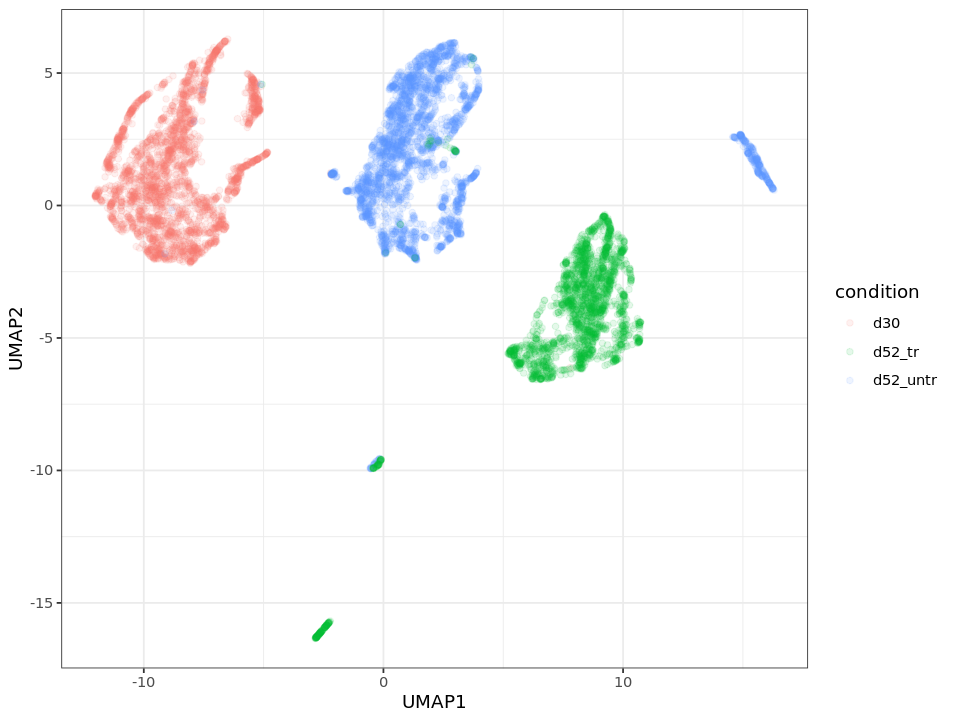

In [12]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df_umap, aes(x = UMAP1, y = UMAP2, col = condition)) + geom_point(alpha = 0.1) + theme_bw()
p

In [13]:
length(unique(sce$donor))

[1] 188

In [14]:
cells_sel1 = rownames(df_umap[df_umap$UMAP2<-7,])
cells_sel2 = rownames(df_umap[df_umap$UMAP1>12,])
cells_sel = c(cells_sel1,cells_sel2)

In [15]:
sce_sel = sce[,cells_sel]

In [16]:
table(sce_sel$donor)


aehn_22 aipt_33  bima_1  eorc_2  iill_3  iudw_1  iuqb_1  jufd_3  kute_5  mioj_1 
     11      22      19      23      18       1      23      12      15      27 
 peoj_1  ruql_3  uaqe_1  zexw_3  zuuy_4 
     11      16      12      21      11 

In [17]:
sce_sel1 = sce[,!(colnames(sce) %in% cells_sel)]

In [18]:
length(unique(sce_sel1$donor))

[1] 182

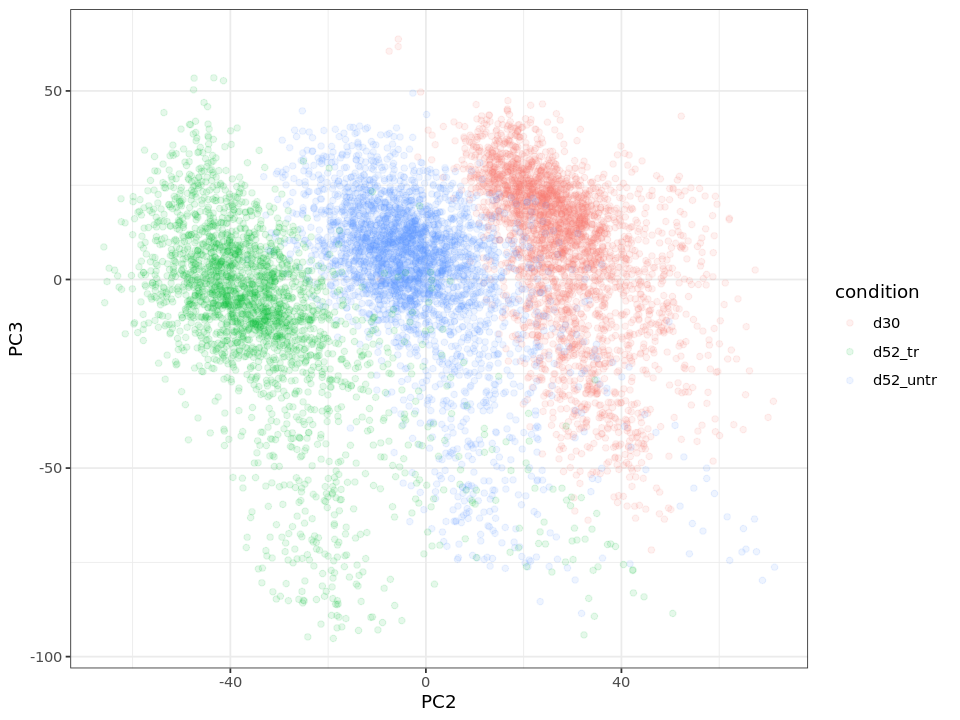

In [20]:
pca = prcomp(t(counts(sce_sel1)))$x
df_pca = data.frame(pca)
df_pca$condition = sce_sel1$condition
p = ggplot(df_pca, aes(x = PC2, y = PC3, col = condition)) + geom_point(alpha = 0.1) + theme_bw()
p

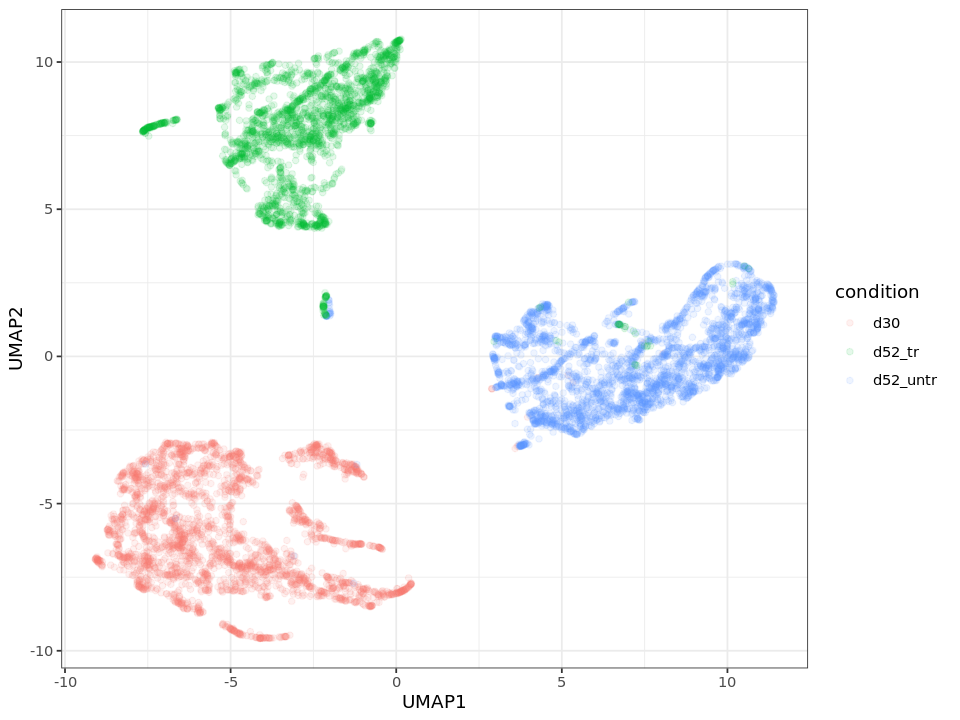

In [21]:
umap = umap(pca[,1:10])
df_umap = data.frame(umap$layout)
colnames(df_umap) = c("UMAP1","UMAP2")
df_umap$condition = sce_sel1$condition
df_umap$donor = sce_sel1$donor
df_umap$pseudocell = sce_sel1$pseudocell
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df_umap, aes(x = UMAP1, y = UMAP2, col = condition)) + geom_point(alpha = 0.1) + theme_bw()
p

In [22]:
write.csv(df_umap, "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/PCA/umap_PC15.csv")

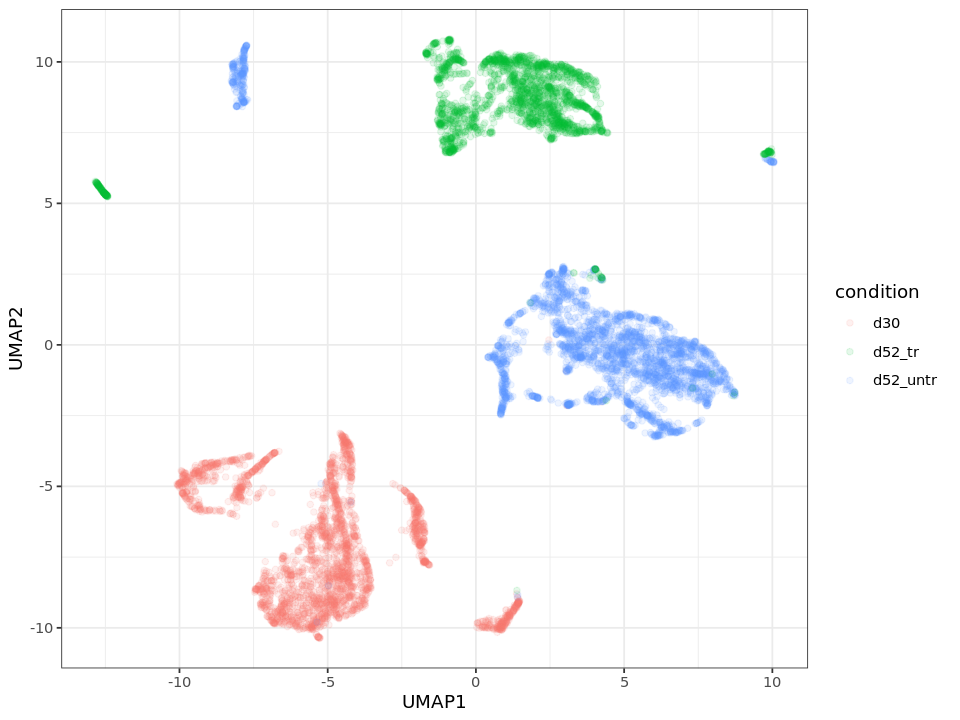

In [85]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df_umap, aes(x = UMAP1, y = UMAP2, col = condition)) + geom_point(alpha = 0.1) + theme_bw()
# p = p + scale_color_canva(palette = "Pool party") 
p

In [88]:
donors = unique(sce$donor)
head(donors)

[1] "iudw_1" "paim_1" "liqa_1" "suop_5" "eiwy_1" "podx_1"

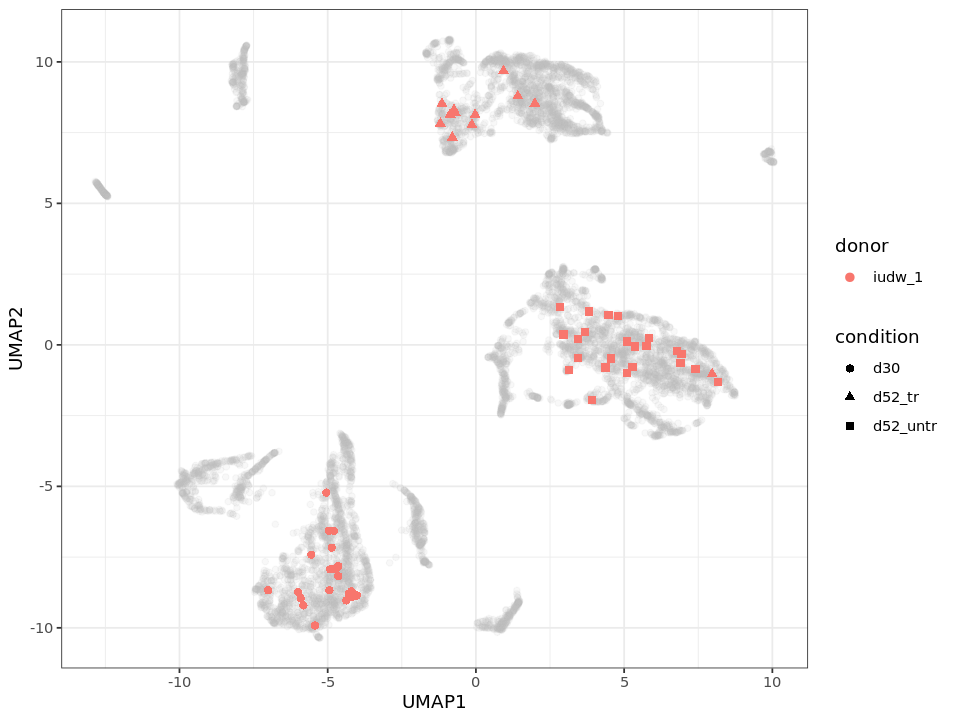

In [103]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df_umap, aes(x = UMAP1, y = UMAP2)) + geom_point(alpha = 0.1, col = "grey") + theme_bw()
p = p + geom_point(aes(x = UMAP1, y = UMAP2, colour = donor, shape = condition),size=2, 
                   data = df_umap[df_umap$donor %in% donors[1],])
p